# Question a


### Decision Tree

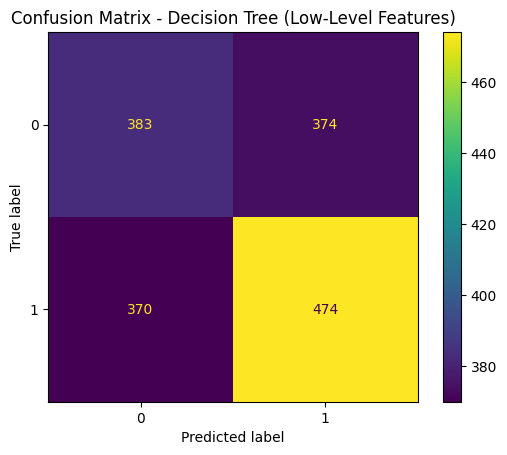

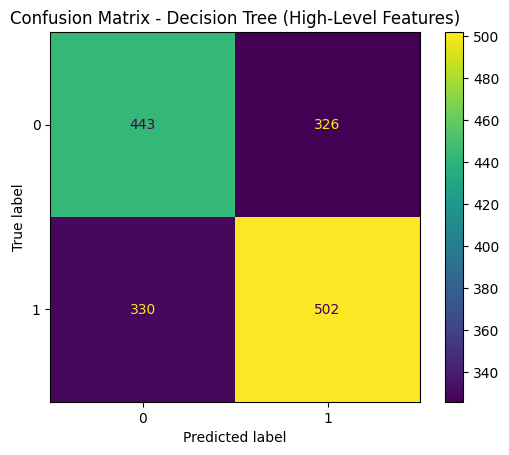

 The accuracy with the low-level quantities is:  0.5353
 The accuracy with the high-level quantities is:  0.5903


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

# Read the csv file
data    =   pd.read_csv( 'HIGGS_8K.csv', header = None )

# Clear the dataset from NaN values, if any
nan     =   data.isnull()

# Convert possible non-numeric values to numeric
data    =   data.apply(pd.to_numeric, errors='coerce')

if nan.any().any(): 
    data    =   data.fillna(0)

# Seperate the dataset to the colums we try to predict from and the columns with the values we try to predict
x       =   data.iloc[ :, 1:-1 ]

y       =   data.iloc[ :, 0 ]

# Define the low-level quantities
low_level   =   x.iloc[ :, 0:22 ]

#Define the high-level quantities
high_level  =   x.iloc[ :, 22:29 ]

# Split into training and testing sets
x_train_low, x_test_low, y_train_low, y_test_low        =   train_test_split( low_level, y, test_size = 0.2 )
#                                                                                               ^ The percentage of data to use as test_data, in our case 20% are test_data, 80% are training data

x_train_high, x_test_high, y_train_high, y_test_high    =   train_test_split( high_level, y, test_size = 0.2 )

# Creat the decision tree and fit it with our details
dtree_low   =   DecisionTreeClassifier().fit(  x_train_low, y_train_low  )
#                                              ^ One for the low-level values

dtree_high  =   DecisionTreeClassifier().fit(  x_train_high, y_train_high ) 
#                                              ^  One for the high-level values

# Predict the valus
y_pred_low  =   dtree_low.predict( x_test_low )
#                                    ^ One for the low-level values

y_pred_high =   dtree_high.predict( x_test_high )
#                                    ^ One for the high-level values

# Compute confusion matrices
cm_low      =   confusion_matrix( y_test_low, y_pred_low )

cm_high     =   confusion_matrix( y_test_high, y_pred_high )

# Compute the accuracies
accuracy_low    =  accuracy_score( y_test_low, y_pred_low )

accuracy_high   =  accuracy_score( y_test_high, y_pred_high )

# Display the comfution matrices
disp_low    =   ConfusionMatrixDisplay( confusion_matrix = cm_low )
# display_labels are the actual class labels (e.g., 0 for background, 1 for signal)

# Plot the confusion matrix
disp_low.plot()

# Add a title for clarity
plt.title( "Confusion Matrix - Decision Tree (Low-Level Features)" )

plt.savefig(" Decision Tree Low Conf Matrix", dpi = 300 )

# Display the comfution matrices
disp_high   =   ConfusionMatrixDisplay( confusion_matrix = cm_high )
# display_labels are the actual class labels (e.g., 0 for background, 1 for signal)

# Plot the confusion matrix
disp_high.plot()

# Add a title for clarity
plt.title( "Confusion Matrix - Decision Tree (High-Level Features)" )

plt.savefig(" Decision Tree High Conf Matrix", dpi = 300 )

# Show the plot
plt.show()

print(f" The accuracy with the low-level quantities is: {accuracy_low: .4f}")
print(f" The accuracy with the high-level quantities is: {accuracy_high: .4f}")

### K-Nearest Neighbors

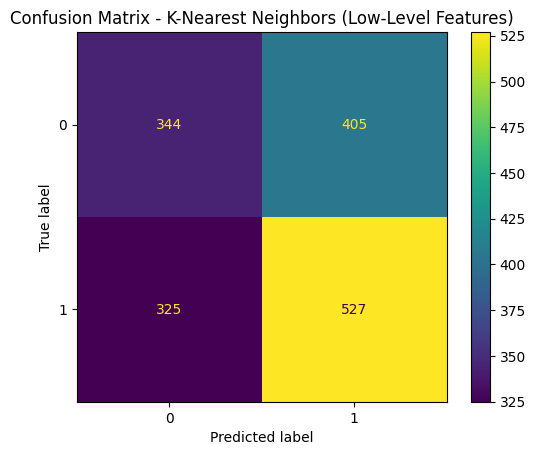

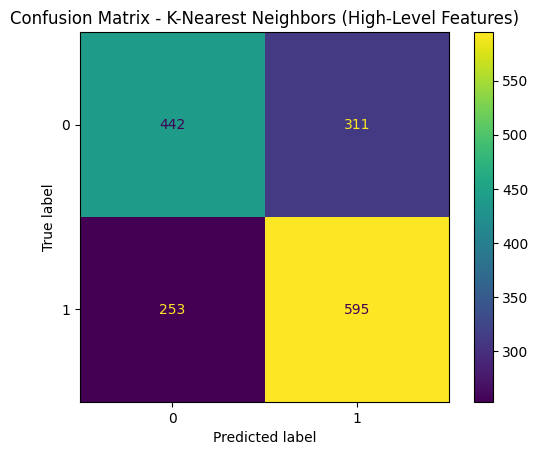

 The accuracy with the low-level quantities is:  0.5440
 The accuracy with the high-level quantities is:  0.6477


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Read the csv file
data    =   pd.read_csv( 'HIGGS_8K.csv', header = None )

# Convert possible non-numeric values to numeric
data    =   data.apply(pd.to_numeric, errors='coerce')

# Clear the dataset from NaN values, if any
nan     =   data.isnull()

if nan.any().any(): 
    data    =   data.fillna(0)

# Seperate the dataset to the colums we try to predict from and the colums with the values we try to predict
x       =   data.iloc[ :, 1:-1 ]

y       =   data.iloc[ :, 0 ]

# Define the low-level quantities
low_level   =   x.iloc[ :, 0:22 ]

#Define the high-level quantities
high_level  =   x.iloc[ :, 22:29 ]

# Split into training and testing sets
x_train_low, x_test_low, y_train_low, y_test_low        =   train_test_split( low_level, y, test_size = 0.2 )
#                                                                                               ^ The percentage of data to use as test_data, in our case 20% are test_data, 80% are training data

x_train_high, x_test_high, y_train_high, y_test_high    =   train_test_split( high_level, y, test_size = 0.2 )

knn_high        =   KNeighborsClassifier( n_neighbors = 5 ).fit( x_train_high, y_train_high )

knn_low         =   KNeighborsClassifier( n_neighbors = 5 ).fit( x_train_low, y_train_low )
#                                                       ^ The number of nearest neighbors that the algorithm will consider when making a prediction for a new data point.
#                                                         A common default value 

y_pred_knn_high =   knn_high.predict( x_test_high )

y_pred_knn_low  =   knn_low.predict( x_test_low )

# The confution matrices
cm_knn_high     =   confusion_matrix( y_test_high, y_pred_knn_high )

cm_knn_low      =   confusion_matrix( y_test_low, y_pred_knn_low )

# The accuracies
accuracy_knn_high  =  accuracy_score( y_test_high, y_pred_knn_high )

accuracy_knn_low   =  accuracy_score( y_test_low, y_pred_knn_low )

disp_knn_low       =   ConfusionMatrixDisplay( confusion_matrix = cm_knn_low )

disp_knn_low.plot()

plt.title( "Confusion Matrix - K-Nearest Neighbors (Low-Level Features)" )

disp_knn_high      =   ConfusionMatrixDisplay( confusion_matrix = cm_knn_high )

disp_knn_high.plot()

plt.title( "Confusion Matrix - K-Nearest Neighbors (High-Level Features)" )

plt.show()

print(f" The accuracy with the low-level quantities is: {accuracy_knn_low: .4f}")
print(f" The accuracy with the high-level quantities is: {accuracy_knn_high: .4f}")

--------------------------------------------------------------------------------------------------------------------------------

# Question b


--------------------------------------------------------------------------------------------------------------------------------------------------------



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the csv file
data    =   pd.read_csv( 'HIGGS_8K.csv', header = None )

# Convert possible non-numeric values to numeric
data    =   data.apply(pd.to_numeric, errors='coerce')

# Clear the dataset from NaN values, if any
nan     =   data.isnull()

if nan.any().any(): 
    data    =   data.fillna(0)

# Seperate the dataset to the colums we try to predict from and the colums with the values we try to predict
x       =   data.iloc[ :, 1:29 ]

y       =   data.iloc[ :, 0 ]

# Define the low-level quantities
low_level   =   x.iloc[ :, 1:21 ]

#Define the high-level quantities
high_level  =   x.iloc[ :, 21:28 ]

# Normalize the values in order to make the training process
scaler      =   StandardScaler()
#                  ^ It computes the mean and standard deviation of each column

x_scaled_low    =   scaler.fit_transform( low_level )
#                  ^ It transforms the data so each feature has mean = 0 and standard deviation = 1

x_scaled_high   =   scaler.fit_transform( high_level )

# Split into training and testing sets
x_train_low, x_test_low, y_train_low, y_test_low     =   train_test_split( x_scaled_low, y, test_size = 0.2 )
#                                                                                               ^ The percentage of data to use as test_data, in our case 20% are test_data, 80% are training data

x_train_high, x_test_high, y_train_high, y_test_high =   train_test_split( x_scaled_high, y, test_size = 0.2 )

# Create the model
#                          ^ Create a linear stack of layers 
model_low       =   tf.keras.models.Sequential([ #                                       ^ So the model will consider also non-linear transformations
                                                tf.keras.layers.Dense( 64, activation = 'relu', input_shape = ( x_train_low.shape[1],) ),
#                                                                      ^ Number of neurons in each layer    
                                                tf.keras.layers.Dense( 32 ),
                                                tf.keras.layers.Dense(  1 )  # The neurons decrease from 64 -> 32 -> 1, in order to output one prediction, in our case 0 or 1
])

model_high       =   tf.keras.models.Sequential([ #                                       ^ So the model will consider also non-linear transformations
                                                tf.keras.layers.Dense( 64, activation = 'relu', input_shape = ( x_train_high.shape[1],) ),    
                                                tf.keras.layers.Dense( 32 ),
                                                tf.keras.layers.Dense(  1 )
])

# Configure the model before training it
# NOTE: All the parameters here were selected as default values from documentation
model_low.compile( optimizer = 'adam', # Adam optimazer
                   loss      = 'binary_crossentropy', # The loss function that measures how well our model predicts the binaries 0, 1 
                   metrics   =  ['accuracy'] ) # This is needed to track the accuracy during training and prediction

model_high.compile( optimizer = 'adam', # Adam optimazer
                   loss      = 'binary_crossentropy', # The loss function that measures how well our model predicts the binaries 0, 1 
                   metrics   =  ['accuracy'] ) # This is needed to track the accuracy during training and prediction

# Train the models, again the values are common as found in documentations
train_low    =    model_low.fit( x_train_low, y_train_low, epochs = 20, batch_size = 64, validation_split = 0.2 )
#                                                             ^            ^               ^ The precentage of the traing data to use as a validation test
#                                                             ^            ^ How many samples from the training set, the model will use to make predictions, compare with the actual labels and
#                                                             ^              update the weights of the model's parameters
#                                                             ^ How many times the model will go through the dataset for training
train_high   =    model_high.fit( x_train_high, y_train_high, epochs = 20, batch_size = 64, validation_split = 0.2 )

# Run the trained model in the test data and predict probabilities for each event to be signal or noise
y_pred_low   = ( model_low.predict( x_test_low ) > 0.5 ).astype( int ) # astype makes the boolean True/False to 0/1
#                                                ^ Threshold: If probability is >0.5 then it is considered signal
#                                                             If probability is <0.5 then it is considered noise

y_pred_high  = ( model_high.predict( x_test_high ) > 0.5 ).astype( int )

print(f" \nThe accuracy with the low-level quantities is: {accuracy_score( y_test_low, y_pred_low ): .4f}")
print(f" \nThe accuracy with the high-level quantities is: {accuracy_score( y_test_high, y_pred_high ): .4f}")

Epoch 1/20


/home/giorgos/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5084 - loss: 3.6535 - val_accuracy: 0.5070 - val_loss: 2.2691
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 1.8799 - val_accuracy: 0.5156 - val_loss: 1.1897
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4914 - loss: 1.6301 - val_accuracy: 0.5016 - val_loss: 3.7178
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5041 - loss: 3.0165 - val_accuracy: 0.5156 - val_loss: 1.9055
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 1.6729 - val_accuracy: 0.5047 - val_loss: 1.1867
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.9376 - val_accuracy: 0.4844 - val_loss: 1.1309
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 0.9101 - val_accuracy: 0.5086 - val_loss: 0.7943
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.7737 - val_accuracy: 0.5195 - val_loss: 0.7895
Epo